In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [17]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import f_classif, f_regression

### Mutual Information Gain for Classification Problem

In [4]:
data = pd.read_csv('datasets/santander-train.csv', nrows=20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
X = data.drop('TARGET', axis=1)
y = data['TARGET']

In [6]:
X.shape, y.shape

((20000, 370), (20000,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

### Remove Constant, quasi Constant, duplicate features

In [8]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [9]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [10]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [11]:
X_train_T.duplicated().sum()

18

In [12]:
dup_features = X_train_T.duplicated()

In [13]:
features_non_dup = [not i for i in dup_features]

In [14]:
X_train_unique = X_train_T[features_non_dup].T
X_test_unique = X_test_T[features_non_dup].T

In [15]:
X_train_unique.head()

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,17282.0,2.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63200.700000
1,38270.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88640.610000
2,31526.0,2.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96314.160000
3,38737.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117568.020000
4,16469.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [16]:
X_train_unique.shape, X_test_unique.shape

((16000, 227), (4000, 227))

### F-Test

In [22]:
sel = f_classif(X_train_unique, y_train)
#sel

In [23]:
p_values = pd.Series(sel[1])
p_values.index = X_train_unique.columns
p_values.sort_values(ascending=True, inplace=True)

In [24]:
p_values

40     7.665738e-70
182    1.494938e-68
86     4.187175e-61
22     5.565785e-56
101    3.557912e-55
           ...     
10     9.288175e-01
12     9.366238e-01
188    9.388951e-01
5      9.609867e-01
75     9.826291e-01
Length: 227, dtype: float64

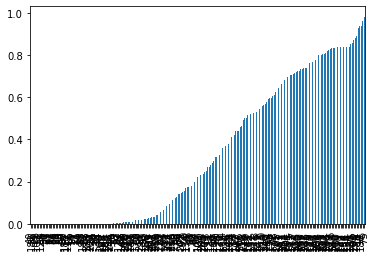

In [25]:
p_values.plot.bar()

In [26]:
p_values[p_values<0.05]

40     7.665738e-70
182    1.494938e-68
86     4.187175e-61
22     5.565785e-56
101    3.557912e-55
           ...     
211    3.232153e-02
186    3.342479e-02
212    4.162651e-02
70     4.286237e-02
110    4.639047e-02
Length: 88, dtype: float64

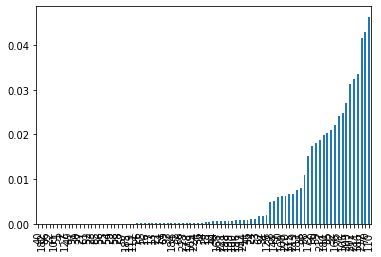

In [27]:
p_values[p_values<0.05].plot.bar()

In [28]:
p_values = p_values[p_values<0.05]

In [29]:
p_values.index

Int64Index([ 40, 182,  86,  22, 101,  51,   2, 127,  49,  91,  30,  27,  61,
             52,  23,  85,  56,  25,  54,  29,  58,  28,  57, 185, 119, 111,
             26,  55,  16,  17,  13,  21,  14,  69,  33, 184,  32,  68, 223,
            178, 109, 224,  36,  34,  15,  18,  44, 168, 221, 198, 199, 100,
            196, 197, 244,  46,  24,  53,  62,  31, 125,  38, 144,  50, 108,
            220, 115, 219, 183,  35,  98, 172,  60,  59, 217, 180,  95,  92,
            166,  72, 105, 209, 202, 211, 186, 212,  70, 110],
           dtype='int64')

In [30]:
X_train_p = X_train_unique[p_values.index]
X_test_p = X_test_unique[p_values.index]

### Build Classifier Model

In [33]:
def random_forest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy : ', accuracy_score(y_test, y_pred))

In [34]:
%%time
random_forest(X_train_p, X_test_p, y_train, y_test)

Accuracy :  0.953
Wall time: 695 ms


In [35]:
%%time
random_forest(X_train, X_test, y_train, y_test)

Accuracy :  0.9585
Wall time: 1.29 s


### For Regression

In [37]:
from sklearn.datasets import load_boston

In [38]:
boston = load_boston()

In [39]:
X = pd.DataFrame(data=boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [40]:
y = boston.target

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

### F-Test

In [45]:
sel = f_regression(X_train, y_train)
#sel

In [46]:
p_values = pd.Series(sel[1])
p_values.index = X_train.columns
p_values.sort_values(ascending=True, inplace=True)

In [47]:
p_values

LSTAT      6.885110e-76
RM         5.643408e-62
PTRATIO    3.071272e-35
INDUS      5.276470e-30
TAX        2.940140e-28
NOX        1.672945e-22
RAD        3.666735e-19
AGE        4.201763e-18
CRIM       6.562503e-18
ZN         8.534560e-18
B          2.183865e-13
DIS        9.084036e-09
CHAS       3.337008e-04
dtype: float64

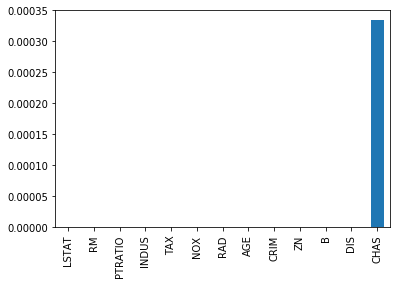

In [50]:
p_values.plot.bar()

In [51]:
X_train_p = X_train.drop('CHAS', axis=1)
X_test_p = X_test.drop('CHAS', axis=1)

In [52]:
X_train_p.shape, X_test_p.shape

((404, 12), (102, 12))

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [56]:
%%time
model = LinearRegression()
model.fit(X_train_p, y_train)
y_pred = model.predict(X_test_p)
print('Accuracy : ', r2_score(y_test, y_pred))

Accuracy :  0.5798488471389449
Wall time: 7.99 ms


In [57]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

5.849124083786661

In [58]:
np.std(y)

9.188011545278203